In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

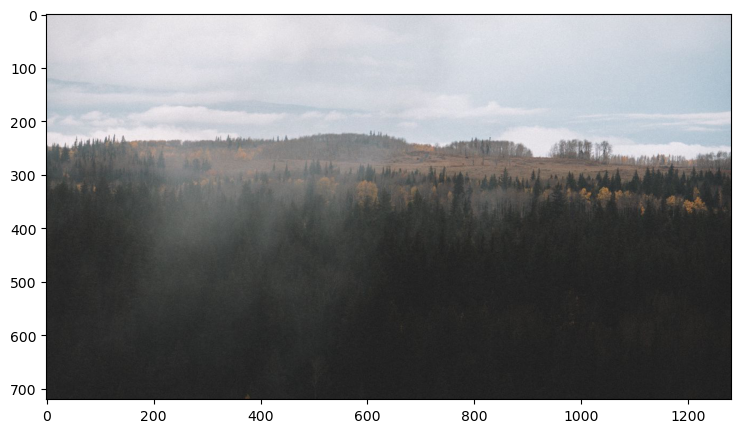

In [30]:
img = cv2.imread('Forest&Clouds.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x1bd000bf390>)

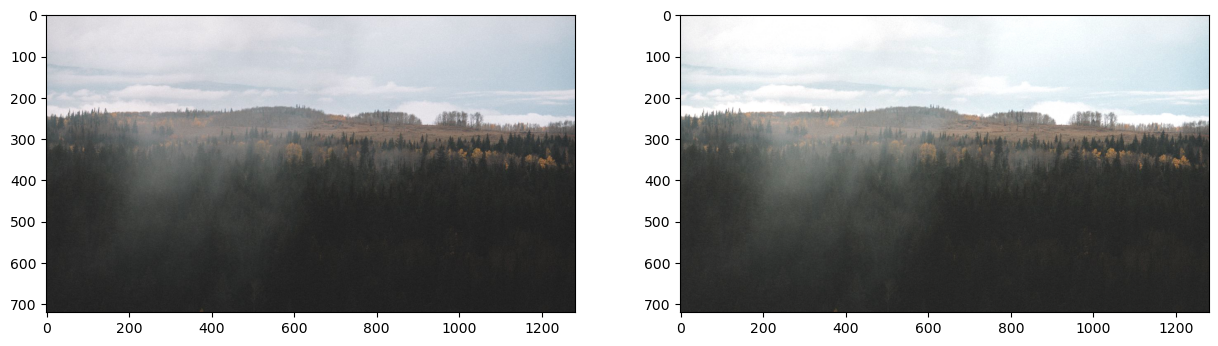

In [31]:
###################################
## CLOSEST TO WHITE COLOR DETECTION
###################################

# At first I tried to find closest color to white, but in this case, for example, If I find even one pixel of white color [255,255,255],
# the picture will not change or for example, if I find almost white color, then picture almost not change
# so to achieve "White patch" algorithm effect we have to use more improved algorithm to find an area not white colors that 
# must be a white or almost white
# So this question is open for me

# Define white color in RGB
#white = np.array([255, 255, 255])

# Variables init
#minDistanceToWhite = float('inf')
#nearestPixelToWhite = None

# Iteration through all pixels
#for i in range(img.shape[0]):
#   for j in range(img.shape[1]):
#       distance = np.linalg.norm(img[i, j] - white)
#       if distance < minDistanceToWhite:
#          minDistanceToWhite = distance
#          nearestPixelToWhite = (i, j)

########################
## WHITE PATCH
########################

# Define white patch and the coefficients
# row, col = nearestPixelToWhite
row, col = 50, 450
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

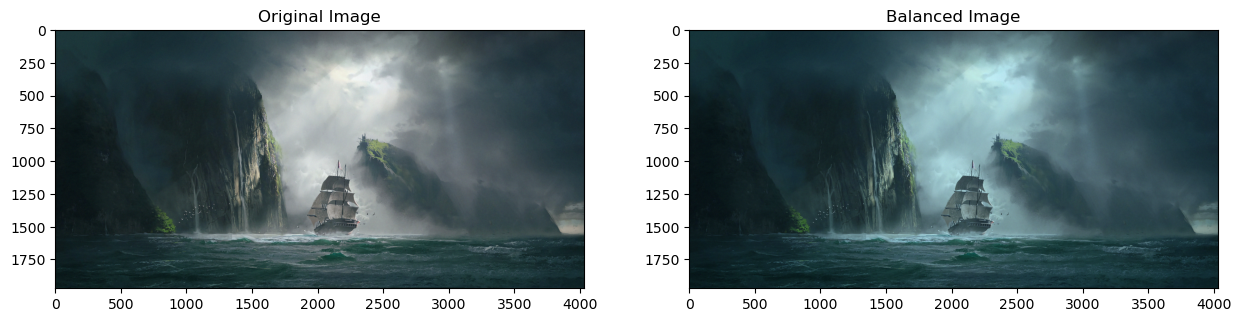

In [32]:
########################
## GRAY PATCH
########################

# Load your image
img = cv2.imread('shipInFog.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Fix the coefficient of the brightest colour channel to 1 (assuming blue is the brightest)
kr = mean_r / mean_b
kg = mean_g / mean_b
kb = 1.0 #because mean_b/mean_b = 1

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[:, :, 0] = img[:, :, 0] * kr
balanced[:, :, 1] = img[:, :, 1] * kg
#in this case enought the next, witout *kb, because kb == 1
#balanced[:, :, 2] = img[:, :, 2] * kb 
balanced[:, :, 2] = img[:, :, 2]

# Clip the values to ensure they are in the valid range [0, 255]
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.title('Original Image')
plt.subplot(122), plt.imshow(balanced)
plt.title('Balanced Image')
plt.show()

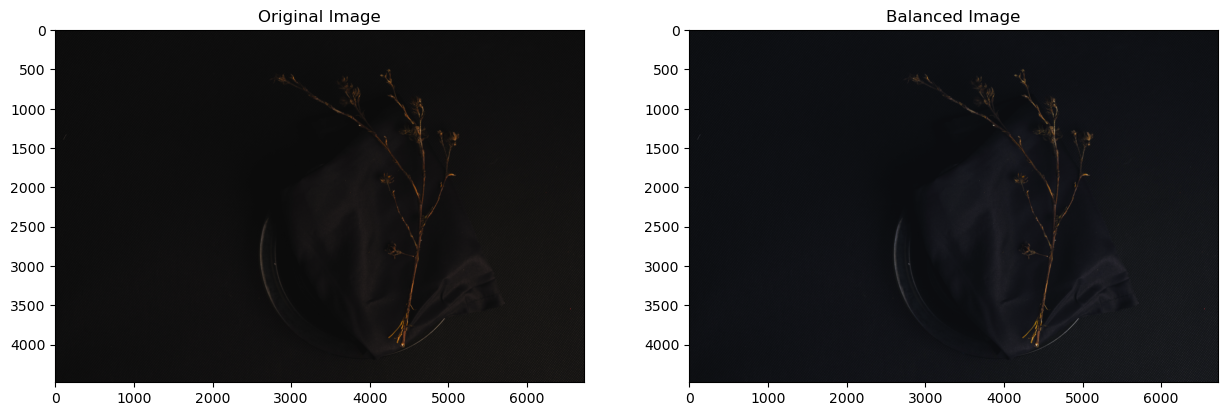

In [33]:
#########################
## SCALE BY MAX
#########################

# Load your image
img = cv2.imread('twig-on-cloth-and-plate.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[:, :, 0] = (img[:, :, 0] / max_r) * 255.0
balanced[:, :, 1] = (img[:, :, 1] / max_g) * 255.0
balanced[:, :, 2] = (img[:, :, 2] / max_b) * 255.0

# Clip the values to ensure they are in the valid range [0, 255]
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Display original and balanced images side by side
plt.subplot(121), plt.imshow(img)
plt.title('Original Image')
plt.subplot(122), plt.imshow(balanced)
plt.title('Balanced Image')
plt.show()